# PTI-Clima Notebooks  <img src="https://www.r-project.org/logo/Rlogo.png" alt="Description" width="60" height="40">

***

> Este cuaderno o notebook muestra las operaciones básicas para comenzar a trabajar con los conjuntos de datos de la PTI-Clima que se incluyen en el [almacén de datos](https://pti.climate.ifca.es/data). Este trabajo está licenciado bajo una [Licencia Creative Commons Atribución 4.0 Internacional](http://creativecommons.org/licenses/by/4.0).
>
> ![Licencia de Creative Commons](https://i.creativecommons.org/l/by/4.0/88x31.png)


## Intercomparación de rejillas observacionales

**M. Iturbide** (Instituto de Física de Cantabria, CSIC-Universidad de Cantabria, Santander, Spain).

**¡Bienvenidos al notebook de *Intercomparación de rejillas observacionales* de la Plataforma Virtual de Cálculo de la PTI-Clima!**  
Esta guía está diseñada para ayudarte a sacar el máximo provecho de los numerosos recursos disponibles en el [**Almacén de Datos de la PTI-Clima**](https://pti.climate.ifca.es/data). A través de esta plataforma, podrás realizar investigaciones y **análisis climáticos de relevancia**, ya que ofrece **acceso transparente a una amplia gama de materiales y datos** subyacentes a los **servicios climáticos desarrollados en la PTI-Clima**, fomentando su **reutilización** y posibilitando la **reproducibilidad** de los productos generados.

En el directorio principal encontrarás el notebook de [**primeros_pasos_R.ipynb**](../../primeros_pasos_R.ipynb) que describe el **objetivo general y la motivación** detrás de esta plataforma virtual, aclarando su propósito y relevancia en el ámbito de la investigación climática. Además, describe el material disponible, brindándote una visión de los diversos conjuntos de datos y recursos a tu disposición para el análisis climático. Finalmente, ilustra **los pasos fundamentales para comenzar a trabajar de manera efectiva con datos climáticos**. 

Esta plataforma cuenta con **software preinstalado y listo para usar** para gestionar y realizar operaciones con datos climáticos. Este software consiste en un conjunto de **paquetes de R**, conocido como el **framework `climate4R`** (Iturbide et al., 2019. DOI: [10.1016/j.envsoft.2018.09.009](https://www.sciencedirect.com/science/article/pii/S1364815218303049?via%3Dihub)), que puede seleccionarse desde el menú de kernel. Para más información, visita [el repositorio de climate4R en GitHub](https://github.com/SantanderMetGroup/climate4R).

<img src="https://raw.githubusercontent.com/SantanderMetGroup/climate4R/refs/heads/devel/man/figures/climate4R_logo.svg" alt="Description" width="60" height="40">

***climate4R*** ofrece más funcionalidades de las que se ilustran en este notebook, como **funcionalidades de operaciones espaciales y temporales** o como **interpolación, subsetting o intersección espacial**. Además, brinda funcionalidades para la **corrección de sesgo y downscaling**. Consulta [Iturbide et al., 2019](https://www.sciencedirect.com/science/article/pii/S1364815218303049?via%3Dihub) y el repositorio de [github de climate4R](https://github.com/SantanderMetGroup/climate4R) para más información.

Para usuarios de Python, también se dispone de un entorno **`python 3`**. Es importante señalar, no obstante, que en este caso el software preinstalado es más básico.


### Contenido de este cuaderno
1) Objetivo y motivación  
2) Descripción del material disponible en el datalab  
3) Carga de datos y operaciones básicas de datos
   * 3.1. Carga de librerías
   * 3.2. Carga de datos
   * 3.3. Estructura de la cuadrícula *climate4R*
   * 3.4. Gráficos iniciales de exploración de datos
   * 3.5. Agregación espacial

Antes de empezar, o en cualquier momento durante el cuaderno, podemos personalizar el área de visualización de gráficos de la siguiente manera:

In [2]:
library(repr)
# Change plot size 
options(repr.plot.width=8, repr.plot.height=5)

***

### Carga de librerias

Las librerías/paquetes centrales de ***climate4R*** que permiten **cargar y transformar** datos (p. ej., agregaciones espaciotemporales) y **visualizarlos** son `loadeR`, `transformeR` y `visualizeR`.

In [1]:
library(loadeR)
library(transformeR)
library(visualizeR)

Loading required package: rJava

Loading required package: loadeR.java

Java version 22x amd64 by N/A detected

NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready

Loading required package: climate4R.UDG

climate4R.UDG version 0.2.6 (2023-06-26) is loaded

Please use 'citation("climate4R.UDG")' to cite this package.

loadeR version 1.8.1 (2023-06-22) is loaded


Get the latest stable version (1.8.2) using <devtools::install_github(c('SantanderMetGroup/climate4R.UDG','SantanderMetGroup/loadeR'))>

Please use 'citation("loadeR")' to cite this package.




    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.2.2 (2023-10-26) is loaded


Get the latest stable version (2.2.3) using <devtools::install_github('SantanderMetGroup/transformeR')>

Please see 'citation("transformeR")' to cite this package.

visualizeR version 1.6.4 (2023-10-26) is loaded

Please see 'citation("visualizeR")' to cite this package.



Sin embargo, el software incluye todo el framework *climate4R* y otras bibliotecas útiles. Por ejemplo, incluye la potente biblioteca de gráficos `lattice` o la biblioteca `magrittr` para operaciones en tuberías (a través de `%>%`).

In [4]:
library(lattice)
library(magrittr)

### Selección de conjuntos de datos

El inventario (`data_inventory.csv`) cataloga la lista de archivos del [**Almacén de datos de la PTI-Clima**](https://pti.climate.ifca.es/data).

Simplemente necesitamos leer este archivo con la función `read.csv` para obtener el `data.frame` con esta información, que contiene seis columnas: `location`, `type`, `variable`, `project`, `experiment`, `frequency`.

In [6]:
df <- read.csv("../../data_inventory.csv")

Podremos ver las primeras filas del `data.frame` resultande con la función `head`.

In [7]:
head(df)

,dataset,type,access,source,provider,experiment,frequency,endpoint
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,AEMET-5KM-regular_Iberia_day,observations,opendap,AEMET-5KM-regular,,,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/AEMET-5KM-regular_Iberia_day.ncml
2,CHELSA-W5E5v1.0_Canarias_day,observations,opendap,CHELSA-W5E5v1.0,,,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/CHELSA-W5E5v1.0_Canarias_day.ncml
3,CHELSA-W5E5v1.0_Iberia_day,observations,opendap,CHELSA-W5E5v1.0,,,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/CHELSA-W5E5v1.0_Iberia_day.ncml
4,PTI-grid-v0_Canarias_day,observations,opendap,PTI-grid-v0,,,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/PTI-grid-v0_Canarias_day.ncml
5,PTI-grid-v0_Iberia_day,observations,opendap,PTI-grid-v0,,,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/PTI-grid-v0_Iberia_day.ncml
6,CORDEX_output_EUR-11_CLMcom-ETH_ICHEC-EC-EARTH_historical_CLMcom-ETH-COSMO-crCLIM-v1-1_v1_day,projections,opendap,CORDEX,ESGF,historical,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/projections/spain/CORDEX_output_EUR-11_CLMcom-ETH_ICHEC-EC-EARTH_historical_CLMcom-ETH-COSMO-crCLIM-v1-1_v1_day.ncml


Se observan diferentes columnas o campos que describen los datos:

* `dataset` se refiere al nombre que se le da a cada instancia de datos en el almacén.
* `type` se refiere al tipo de los conjuntos de datos, ya sea "observaciones" (observations), "reanalisis" (reanalysis) o proyecciones (projections).
* `source` se refiere al conjuntos de datos de origen (p. ej., CORDEX-EUR, CMIP5, CMIP6, etc.).  
* `provider` se refiere a la entidad distribuidora de donde se obtuvieron los datos originales.  
* `access` se refiere al modo de acceso, ya sea local (netcdf) o remoto (opendap).
* `experiment` se refiere al escenario (p. ej., historical, rcp26, ssp126, rcp85, etc.).
* `frequency` se refiere a la escala temporal de los datos.
* `endpoint` se refiere a la ruta del archivo de datos. Esta ruta es la que se utilizará para cargar los datos más adelante.  

Podemos **aplicar fácilmente filtros** para obtener el archivo deseado. El objetivo de este notebook es intercomparar las rejillas observacionales disponibles (incluyendo reanalysis), por lo tanto, filtraremos el catálogo de datos por tipo (`type`). Nos quedaremos con el nombre del `dataset` y el `endpoint`.

In [19]:
obs <- subset(df, type == "observations")[c("dataset", "endpoint")]
rea <- subset(df, type == "reanalysis")[c("dataset", "endpoint")]
datasets <- rbind(obs, rea) %>% print

                         dataset
1   AEMET-5KM-regular_Iberia_day
2   CHELSA-W5E5v1.0_Canarias_day
3     CHELSA-W5E5v1.0_Iberia_day
4       PTI-grid-v0_Canarias_day
5         PTI-grid-v0_Iberia_day
117       ERA5-Land_Canarias_day
118         ERA5-Land_Iberia_day
                                                                                               endpoint
1   https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/AEMET-5KM-regular_Iberia_day.ncml
2   https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/CHELSA-W5E5v1.0_Canarias_day.ncml
3     https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/CHELSA-W5E5v1.0_Iberia_day.ncml
4       https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/PTI-grid-v0_Canarias_day.ncml
5         https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/PTI-grid-v0_Iberia_day.ncml
117         https://data.meteo.unican.es/thredds/dodsC/PTI-clima/reanalysis/ERA5-Land_Canarias_day.ncml
118     

In [ ]:
En este caso, optaremos por la región de España peninsular y Baleares. Estos son los datasets que contienen `Iberia` en su nombre.

In [25]:
ind <- grep("Iberia", datasets$dataset)
datasets <- datasets[ind,] %>% print

                         dataset
1   AEMET-5KM-regular_Iberia_day
3     CHELSA-W5E5v1.0_Iberia_day
5         PTI-grid-v0_Iberia_day
118         ERA5-Land_Iberia_day
                                                                                               endpoint
1   https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/AEMET-5KM-regular_Iberia_day.ncml
3     https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/CHELSA-W5E5v1.0_Iberia_day.ncml
5         https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/PTI-grid-v0_Iberia_day.ncml
118           https://data.meteo.unican.es/thredds/dodsC/PTI-clima/reanalysis/ERA5-Land_Iberia_day.ncml


Una vez que tenemos los datasets y sus `endpoint`, podemos mostrar fácilmente las características de los datos que contienen. Para hacerlo, empleamos la función `dataInventory` del paquete `loadeR`. Por ejemplo, para el dataset **AEMET-5KM-regular_Iberia_day**, realizaremos el inventario de la siguiente manera.

In [28]:
AEMET5KM.endpoint <- subset(datasets, dataset == "AEMET-5KM-regular_Iberia_day")[["endpoint"]]
di <- dataInventory(AEMET5KM.endpoint)

[2025-01-15 18:03:50.688642] Doing inventory ...

[2025-01-15 18:03:53.85341] Opening dataset...

[2025-01-15 18:03:56.577843] The dataset was successfuly opened

[2025-01-15 18:03:57.69077] Retrieving info for 'pr' (2 vars remaining)

[2025-01-15 18:03:57.81817] Retrieving info for 'tasmax' (1 vars remaining)

[2025-01-15 18:03:57.897056] Retrieving info for 'tasmin' (0 vars remaining)

[2025-01-15 18:03:57.981187] Done.



Podemos echar un primer vistazo a la información disponible con `str`.

In [29]:
str(di)

List of 3
 $ pr    :List of 7
  ..$ Description: chr "precipitation amount"
  ..$ DataType   : chr "float"
  ..$ Shape      : int [1:3] 26298 170 273
  ..$ Units      : chr "kg m-2"
  ..$ DataSizeMb : num 4882
  ..$ Version    : logi NA
  ..$ Dimensions :List of 3
  .. ..$ time:List of 4
  .. .. ..$ Type      : chr "Time"
  .. .. ..$ TimeStep  : chr "1.0 days"
  .. .. ..$ Units     : chr "days since 1951-01-01 00:00:00"
  .. .. ..$ Date_range: chr "1951-01-01T00:00:00Z - 2022-12-31T00:00:00Z"
  .. ..$ lat :List of 5
  .. .. ..$ Type       : chr "Lat"
  .. .. ..$ Units      : chr "degrees_north"
  .. .. ..$ Values     : num [1:170] 35.3 35.3 35.4 35.4 35.5 ...
  .. .. ..$ Shape      : int 170
  .. .. ..$ Coordinates: chr "lat"
  .. ..$ lon :List of 5
  .. .. ..$ Type       : chr "Lon"
  .. .. ..$ Units      : chr "degrees_east"
  .. .. ..$ Values     : num [1:273] -9.32 -9.27 -9.22 -9.17 -9.12 ...
  .. .. ..$ Shape      : int 273
  .. .. ..$ Coordinates: chr "lon"
 $ tasmax:List of 7
  

Vemos que hay tres variables disponibles: pr, tasmax y tasmin. Para cada una de ellas se detalla información adicional, como las unidades,el periodo temporal que cubren, las coordenadas etc.

In [33]:
endpoint <- "https://data.meteo.unican.es/thredds/dodsC/PTI-clima/projections/spain/CORDEX_output_EUR-11_CLMcom-ETH_ICHEC-EC-EARTH_historical_CLMcom-ETH-COSMO-crCLIM-v1-1_v1_day.ncml"
dataInventory(endpoint) %>% str

[2025-01-15 18:55:12.535432] Doing inventory ...

[2025-01-15 18:55:26.502505] Opening dataset...

[2025-01-15 18:55:27.8887] The dataset was successfuly opened

[2025-01-15 18:55:28.829725] Retrieving info for 'pr' (4 vars remaining)

[2025-01-15 18:55:28.901843] Retrieving info for 'tas' (3 vars remaining)

[2025-01-15 18:55:28.981743] Retrieving info for 'tasmax' (2 vars remaining)

[2025-01-15 18:55:29.047273] Retrieving info for 'tasmin' (1 vars remaining)

[2025-01-15 18:55:29.112762] Retrieving info for 'tasrange' (0 vars remaining)

[2025-01-15 18:55:29.187101] Done.



List of 5
 $ pr      :List of 7
  ..$ Description: NULL
  ..$ DataType   : chr "float"
  ..$ Shape      : int [1:3] 20454 170 273
  ..$ Units      : chr "mm"
  ..$ DataSizeMb : num 3797
  ..$ Version    : logi NA
  ..$ Dimensions :List of 3
  .. ..$ time:List of 4
  .. .. ..$ Type      : chr "Time"
  .. .. ..$ TimeStep  : chr "1.0 days"
  .. .. ..$ Units     : chr "days since 1950-01-01"
  .. .. ..$ Date_range: chr "1950-01-01T00:00:00Z - 2005-12-31T00:00:00Z"
  .. ..$ lat :List of 5
  .. .. ..$ Type       : chr "Lat"
  .. .. ..$ Units      : chr "degrees_north"
  .. .. ..$ Values     : num [1:170] 35.3 35.3 35.4 35.4 35.5 ...
  .. .. ..$ Shape      : int 170
  .. .. ..$ Coordinates: chr "lat"
  .. ..$ lon :List of 5
  .. .. ..$ Type       : chr "Lon"
  .. .. ..$ Units      : chr "degrees_east"
  .. .. ..$ Values     : num [1:273] -9.32 -9.27 -9.22 -9.17 -9.12 ...
  .. .. ..$ Shape      : int 273
  .. .. ..$ Coordinates: chr "lon"
 $ tas     :List of 7
  ..$ Description: NULL
  ..$ Dat

### 3. Carga de datos y operaciones básicas


La carga de datos se realiza mediante la función `loadGridData` especificando, como fuente de datos, la ruta de un archivo NetCDF o de un catálogo NcML. En nuestro caso, esa ruta es precisamente lo que encapsula el objeto `endpoint` que hemos definido anteriormente.

También es necesario especificar el parámetro `var`, que en este ejemplo se establece como `tasmax` (temperatura superficial maxima). Ten en cuenta que `loadGridData` permite establecer parámetros adicionales. Por ejemplo, podríamos utilizar los parámetros `lonLim` y `latLim` para cargar únicamente el subconjunto de datos correspondiente a una región más pequeña. Si no se emplean estos parámetros se carga el dominio completo (como en este caso). Otro parámetro útil es `season`, para cargar datos de meses específicos (en este ejemplo, JJA para el verano boreal). En el parámetro `years`, especificamos el periodo deseado (en este caso, 1991-2020). Ejecuta `help(loadGridData)` para consultar otros parámetros disponibles.  La carga de datos puede tardar segundos o minutos dependiendo de la cantidad de datos que corresponda a la petición que hagamos.

In [11]:
tasmax.jja <- loadGridData(dataset = endpoint,
             var = "tasmax",
             season = 6:8,
             years = 1991:2020)

[2025-01-15 14:07:38.443452] Opening dataset...

[2025-01-15 14:07:39.884199] The dataset was successfuly opened

[2025-01-15 14:07:39.891237] Defining geo-location parameters

[2025-01-15 14:07:39.986385] Defining time selection parameters

[2025-01-15 14:07:40.23606] Retrieving data subset ...

[2025-01-15 14:13:37.847142] Done



#### 3.3. La estructura del `grid` de *climate4R*

El objeto resultante (aquí llamado `tasmax.jja`) es un *grid* de *climate4R*, que consiste en un objeto de tipo `list` con los siguientes slots: `Variable`, `Data`, `xyCoordinates`, `Dates` (y `Members` cuando se tratan de datos varios modelos, como ocurre con las proyecciones climáticas). 

In [12]:
str(tasmax.jja)

List of 4
 $ Variable:List of 2
  ..$ varName: chr "tasmax"
  ..$ level  : NULL
  ..- attr(*, "use_dictionary")= logi FALSE
  ..- attr(*, "description")= chr "temperature"
  ..- attr(*, "units")= chr "C"
  ..- attr(*, "longname")= chr "tasmax"
  ..- attr(*, "daily_agg_cellfun")= chr "none"
  ..- attr(*, "monthly_agg_cellfun")= chr "none"
  ..- attr(*, "verification_time")= chr "none"
 $ Data    : num [1:2760, 1:170, 1:273] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
  ..- attr(*, "dimensions")= chr [1:3] "time" "lat" "lon"
 $ xyCoords:List of 2
  ..$ x: num [1:273] -9.32 -9.27 -9.22 -9.17 -9.12 ...
  ..$ y: num [1:170] 35.3 35.3 35.4 35.4 35.5 ...
  ..- attr(*, "projection")= chr "LatLonProjection"
  ..- attr(*, "resX")= num 0.05
  ..- attr(*, "resY")= num 0.05
 $ Dates   :List of 2
  ..$ start: chr [1:2760] "1991-06-01 00:00:00 GMT" "1991-06-02 00:00:00 GMT" "1991-06-03 00:00:00 GMT" "1991-06-04 00:00:00 GMT" ...
  ..$ end  : chr [1:2760] "1991-06-01 00:00:00 GMT" "1991-06-02 00:00:00

Por lo tanto, la información se puede extraer utilizando `$`. Por ejemplo, el array de datos se puede obtener ejecutando `tasmax.jja$Data`. Aquí también aplicamos `str` para mostrar la estructura del array de datos.

In [13]:
data.array <- tasmax.jja$Data %>% str

 num [1:2760, 1:170, 1:273] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
 - attr(*, "dimensions")= chr [1:3] "time" "lat" "lon"


Sin embargo, **dado que las funciones de *climate4R* trabajan de manera transparente con la estructura `grid`, no es necesario extraer ningún componente de la lista para realizar distintas operaciones de transformación y visualización.**

#### 3.4. Gráficos iniciales de exploración de datos

Antes de continuar, podemos examinar los datos, por ejemplo, representando mapas. Para ello, primero calculamos la climatología con la función `climatology` del paquete `transformeR`. Esta función agrega la dimensión temporal de los datos utilizando la media como función por defecto, sin embargo, podríamos utilizar cualquier otra función a través del parámetro `clim.fun` (p.ej. `climatology(tasmax.jja, clim.fun = list("max", na.rm = TRUE)`). Posteriormente, utilizamos la función `spatialPlot` del paquete `visualizeR` (ejecuta `help(spatialPlot)` para consultar diferentes parámetros de representación gráfica).

[2025-01-15 14:13:39.311474] - Computing climatology...

[2025-01-15 14:13:43.002377] - Done.



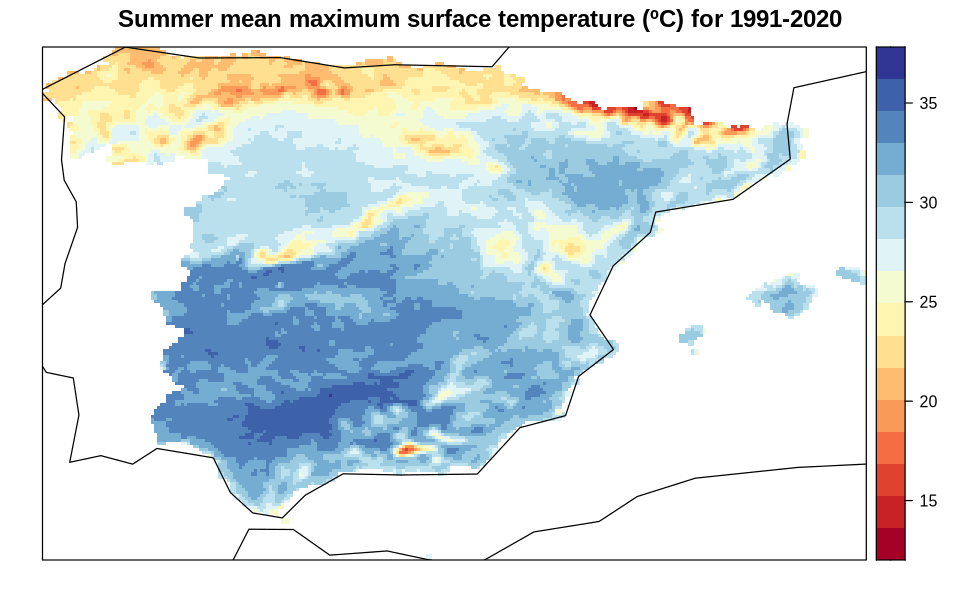

In [14]:
tasmax.jja.c <- climatology(tasmax.jja) 
spatialPlot(tasmax.jja.c, 
            backdrop.theme = "coastline", 
            col.theme = "OrRdBn",
            main = "Summer mean maximum surface temperature (ºC) for 1991-2020")

También podríamos mostrar la serie temporal con `temporalPlot` para los valores mensuales originales...

pad applied on the interval: day



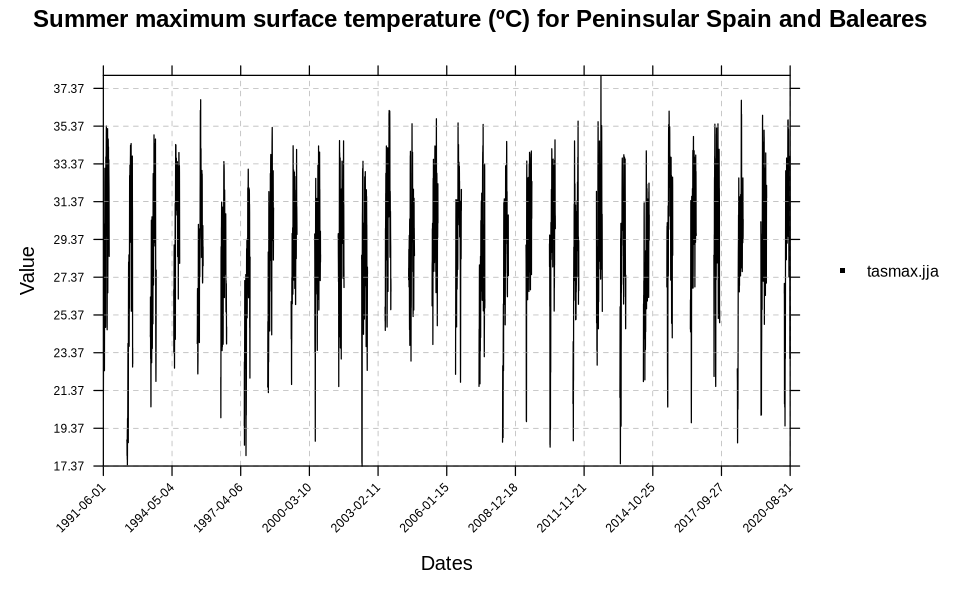

In [15]:
temporalPlot(tasmax.jja, xyplot.custom = list(main = "Summer maximum surface temperature (ºC) for Peninsular Spain and Baleares"))

...o los valores anuales agregados aplicando previamente la función `aggregateGrid` (esta vez cambiaremos el color, ejecuta `help(temporalPlot)` para realizar más personalizaciones):

[2025-01-15 14:13:59.528857] Performing annual aggregation...

[2025-01-15 14:14:16.853752] Done.

pad applied on the interval: year



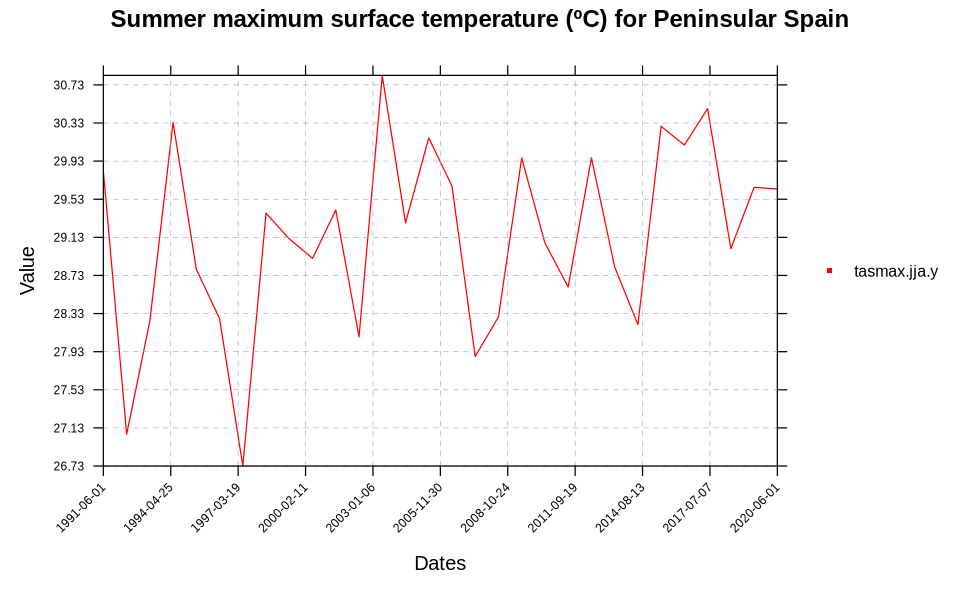

In [16]:
tasmax.jja.y <- aggregateGrid(tasmax.jja, aggr.y = list(FUN = "mean", na.rm = T))
temporalPlot(tasmax.jja.y, 
             cols = "red",
             xyplot.custom = list(main = "Summer maximum surface temperature (ºC) for Peninsular Spain"))

#### 3.5. Agregación espacial

La función que genera la figura de series temporales que hemos utilizado anteriormente realiza automáticamente la agregación espacial de los datos, utilizando la media como función de agregación por defecto y **ponderando los valores según la latitud**. Sin embargo, podemos controlar esta operación utilizando el parámetro `aggr.spatial`, tanto en la función `temporalPlot`, como en la función `aggregateGrid` si queremos generar el objeto agregado. En el siguiente ejemplo, calculamos la máxima espacial:

In [17]:
tasmax.jja.regional.max <- aggregateGrid(tasmax.jja.y, aggr.spatial = list(FUN = "max", na.rm = TRUE))

Spatial weighting skipped: It only applies to 'mean' aggregation function

[2025-01-15 14:14:17.113567] - Aggregating spatially...

[2025-01-15 14:14:17.146365] - Done.



También podemos crear las series temporales del objeto previamente agregado:

pad applied on the interval: year



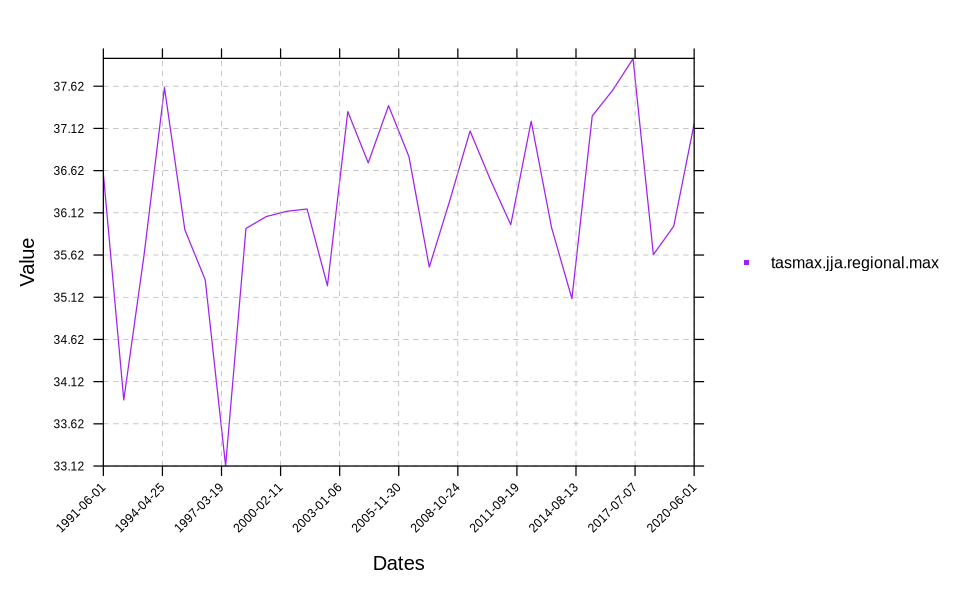

In [18]:
temporalPlot(tasmax.jja.regional.max, cols = "purple")

El **framework *climate4R*** ofrece muchas otras **funcionalidades de operaciones espaciales y temporales**, como **interpolación, subsetting o intersección espacial**. Además, brinda funcionalidades para la **corrección de sesgo y downscaling**. Consulta [Iturbide et al., 2019](https://www.sciencedirect.com/science/article/pii/S1364815218303049?via%3Dihub) y el repositorio de [github de climate4R](https://github.com/SantanderMetGroup/climate4R) para más información.


***

### Session Info

In [19]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 22.04.3 LTS

Matrix products: default
BLAS/LAPACK: /opt/conda/envs/climate4r/lib/libopenblasp-r0.3.27.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8          LC_NUMERIC=C                 
 [3] LC_TIME=en_US.UTF-8           LC_COLLATE=en_US.UTF-8       
 [5] LC_MONETARY=en_US.UTF-8       LC_MESSAGES=en_US.UTF-8      
 [7] LC_PAPER=en_US.UTF-8          LC_NAME=en_US.UTF-8          
 [9] LC_ADDRESS=en_US.UTF-8        LC_TELEPHONE=en_US.UTF-8     
[11] LC_MEASUREMENT=en_US.UTF-8    LC_IDENTIFICATION=en_US.UTF-8

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] magrittr_2.0.3      lattice_0.22-6      visualizeR_1.6.4   
[4] transformeR_2.2.2   loadeR_1.8.1        climate4R.UDG_0.2.6
[7] loadeR.java_1.1.1   rJava_1.0-11        repr_1.1.7         

loaded via 